# Introduction:
## Institute: The Sparks Foundation
## Intern name: Frenko Jha
### Internship in Data Science & Business Analytics

# Case study on supervised machine learning with R language

Que.- Predict the percentage of an student based on the number of study hours 

In [1]:
# Importing important libraries
# ggplot2 library use for visualization of data
# dplyr is useful for using r internal functions
library(ggplot2)
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Data extraction funtion in jupyter library
# getwd() function use to check the default repository
# use read.csv("url") this use for getting online data
# Std_data stands for student dataset which we get form the url
getwd()
Std_data <- read.csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
Std_data


[1] "C:/Users/91810/Desktop/RStudio files/Jupyter notebook files"

Hours,Scores
<dbl>,<int>
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81


In [3]:
# head() function use to see the starting 6 entries of data
# tail() function use to see the last 6 entries of data
head(Std_data)
tail(Std_data)

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


,Hours,Scores
,<dbl>,<int>
20,7.4,69
21,2.7,30
22,4.8,54
23,3.8,35
24,6.9,76
25,7.8,86


In [5]:
# to check the null value in the data set. 
# Use anyNA(is.na(dataset name))
# return false means dataset don't have NA values
# sum(is.na(dataset name)) returns counting of NA values
anyNA(is.na(Std_data))
sum(is.na(Std_data))

[1] FALSE

[1] 0

In [6]:
# To check the structure and summary of data using same function
# quantile function checks the minimum, mean, median, maximum value
# this function use for statistics purpose
# quantile(dataset_name$variable_name) applied on a particular variable of dataset 
str(Std_data)
summary(Std_data)
quantile(Std_data$Hours)

'data.frame':	25 obs. of  2 variables:
 $ Hours : num  2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 ...
 $ Scores: int  21 47 27 75 30 20 88 60 81 25 ...


     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

0%  25%  50%  75% 100% 
 1.1  2.7  4.8  7.4  9.2

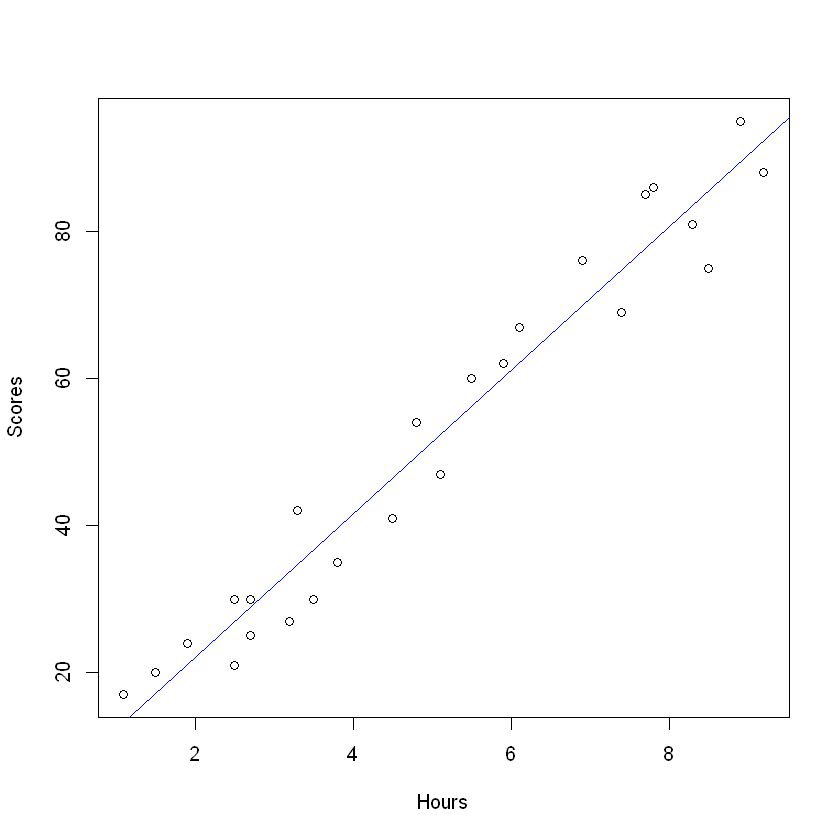

In [7]:
# to check the outliers use box plot in case of continous variable
# in r language there is two type of visualization method can use
# 1. Base plot 
# 2. ggplot 
# plot(dataset_name) under the base plot
# abline shows a regression line between two variable
plot(Std_data)
abline(lm(Scores ~ Hours, data = Std_data), col = "blue")

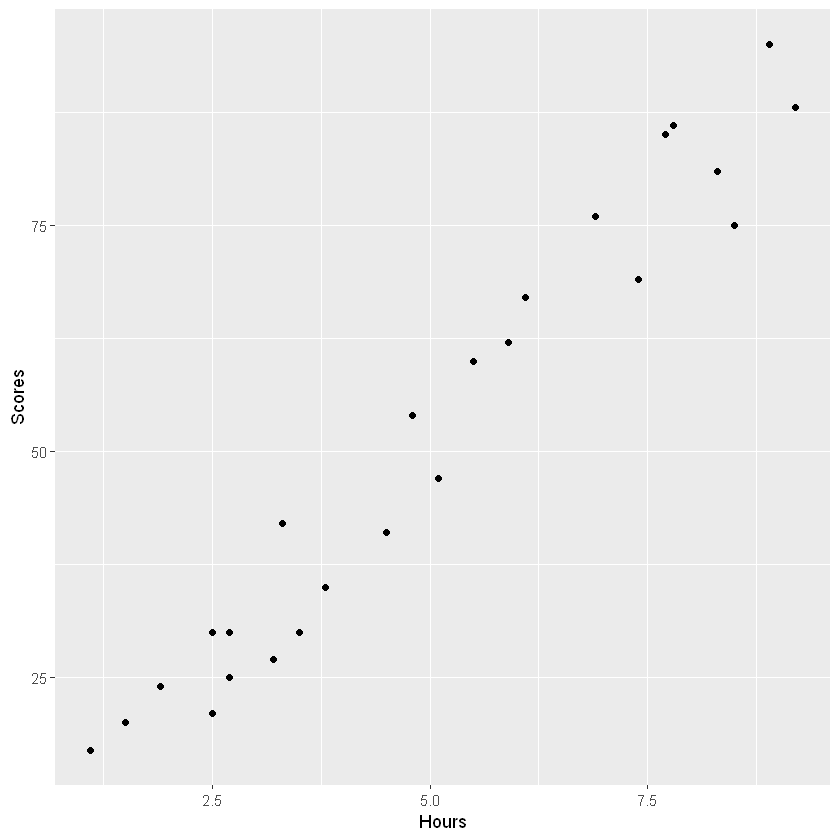

In [10]:
# Under ggplot use
# aes stands for axis use to put x and y axis variables
ggplot(Std_data, aes(x = Hours, y = Scores))+
geom_point()

Visualization technic use to see the relationship between variables
This is also called exploratory analysis
In this case relation between variables are positive

In [8]:
# Spliting the dataset
# training and testing 
# which is very important part of data analysis
# for spliting use sample() function which is already the part of internal library in R
# spliting data 70:30 ratio 
# Questionnaires why 70:30 why not 80:20 why not 65:35
# Answer is too small but important. According to the size of dataset decided

spliting_data <- sample(1:nrow(Std_data), 0.7*nrow(Std_data), replace = F)
traindata <- Std_data[spliting_data,]
testdata <- Std_data[-spliting_data,]
traindata
testdata

,Hours,Scores
,<dbl>,<int>
21,2.7,30
16,8.9,95
4,8.5,75
8,5.5,60
9,8.3,81
12,5.9,62
15,1.1,17
18,1.9,24
10,2.7,25


,Hours,Scores
,<dbl>,<int>
1,2.5,21
3,3.2,27
11,7.7,85
14,3.3,42
17,2.5,30
19,6.1,67
20,7.4,69
24,6.9,76


After completion of statistics part
now will go for modeling according to analysis

# Creating a predictive model 
1. Before predicting a model
2. How will say that which model is best for prediction
3. it's all depends on your variable and it's nature
    

# Two type of variable nature
1. Continous 
2. Categorical



And we have two continous variable one is dependent and one is independent 
According to question 
Scores is our dependent variable and Hours is our independent variable
In this case, a linear model is created

# Linear regression model
# y = mx + c
lm model will use
1. y = dependent continous variable
2. m = independent variable 
3. x = coefficient
4. c = intercept

In [12]:
# to show the variable names
names(Std_data)


[1] "Hours"  "Scores"

In [9]:
# creating linear regression model
set.seed(70)
line_model <- lm(Scores ~ Hours
                , data = traindata)
summary(line_model)


Call:
lm(formula = Scores ~ Hours, data = traindata)

Residuals:
   Min     1Q Median     3Q    Max 
-9.128 -4.352  1.127  3.370  8.541 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1505     2.7813   1.133    0.275    
Hours         9.5267     0.4896  19.457  4.7e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.285 on 15 degrees of freedom
Multiple R-squared:  0.9619,	Adjusted R-squared:  0.9593 
F-statistic: 378.6 on 1 and 15 DF,  p-value: 4.701e-12


# Testing, predicted dependent variable with test dataset

In [13]:
# Adding a pred_scores column in testdata for testing 
# the value with actual value of scores
testdata$pred_scores <- predict(line_model, new = testdata)
testdata
testdata$pred_scores<- sprintf(testdata$pred_scores, fmt = '%#.1f')
testdata

,Hours,Scores,pred_scores
,<dbl>,<int>,<dbl>
1,2.5,21,26.96734
3,3.2,27,33.63606
11,7.7,85,76.50639
14,3.3,42,34.58873
17,2.5,30,26.96734
19,6.1,67,61.26361
20,7.4,69,73.64837
24,6.9,76,68.88500


,Hours,Scores,pred_scores
,<dbl>,<int>,<chr>
1,2.5,21,27.0
3,3.2,27,33.6
11,7.7,85,76.5
14,3.3,42,34.6
17,2.5,30,27.0
19,6.1,67,61.3
20,7.4,69,73.6
24,6.9,76,68.9


In [16]:
str(testdata)
testdata$pred_scores <- as.numeric(testdata$pred_scores)
str(testdata)

'data.frame':	8 obs. of  3 variables:
 $ Hours      : num  2.5 3.2 7.7 3.3 2.5 6.1 7.4 6.9
 $ Scores     : int  21 27 85 42 30 67 69 76
 $ pred_scores: num  27 33.6 76.5 34.6 27 61.3 73.6 68.9
'data.frame':	8 obs. of  3 variables:
 $ Hours      : num  2.5 3.2 7.7 3.3 2.5 6.1 7.4 6.9
 $ Scores     : int  21 27 85 42 30 67 69 76
 $ pred_scores: num  27 33.6 76.5 34.6 27 61.3 73.6 68.9


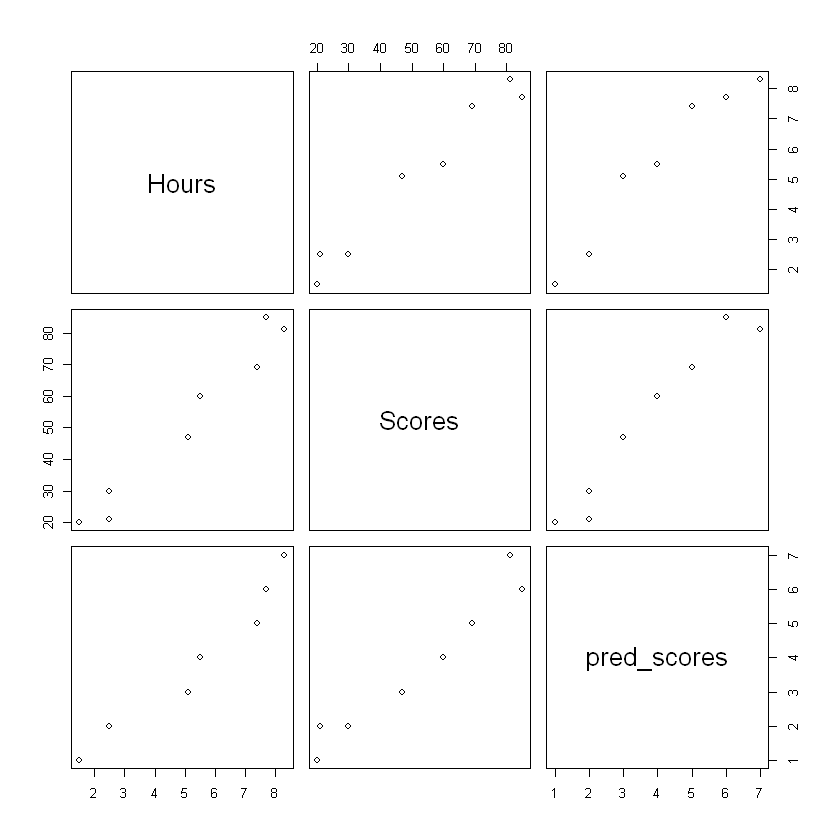

In [26]:
# ploting relationship with predicted scores
plot(testdata)
abline(lm(pred_scores ~ Hours, data = testdata), col= "blue")

In [17]:
#MAPE(MeanAbsolutePercentageError): 
#Lower its value better is the accuracy of the model.
#MAPE Calculation:
#Percentage Error 14.3% 
mape <- mean(abs((testdata$pred_scores - testdata$Scores))/testdata$Scores)*100
mape

[1] 14.39389

In [20]:
# Mape using mape function
#install.packages("Metrics")
# can check the accuracy via calling metrics library
# get a same almost same result 13.91% Percentage Error
library(Metrics)
mape(testdata$pred_scores,testdata$Scores)*100

[1] 13.91599

# What will be predicted scores if a student studies for 9.25 hrs/ day?

# Equation to calculate the predictive scores
# Scores = 2.425 + 9.820*Hours

1. Scores = 3.150 + 9.52*9.25
2. Scores = 91.21